# Community detection - based methods

Here are the testing procedures based on 500KN-Crowd.

In [1]:
import numpy as np
import graphMethods.kwextractor_methods as kwmethods
import dataset_500 as ds500

In [2]:
dataReader = ds500.DataReader()
dataReader.fetch_data()

Data loading started...
data has been loaded!


In [3]:
#[0] -- texts, dataReader.train_data[1] answers
def JaccardIndex(set1,set2):
    return len(set1.intersection(set2))/ len(set1.union(set2))


In [4]:
#Veeeeery slow, computed in advance and saved in pickle
#jinds_louvain = np.zeros(len(dataReader.train_data[0]))
#jinds_gn = np.zeros(len(dataReader.train_data[0]))
#jinds_fluid = np.zeros(len(dataReader.train_data[0])) # does not work
#jinds_kcore = np.zeros(len(dataReader.train_data[0]))

#for i in np.arange(len(jinds_louvain)):
#    print(i,"of",len(jinds_louvain))
#    jinds_louvain[i] =  JaccardIndex(set(kwmethods.LouvainExtractor(dataReader.train_data[0][i],window=3,verbose=False)),set(map(lambda x : x.lower(), dataReader.train_data[1][i])))
#    jinds_gn[i] =  JaccardIndex(set(kwmethods.GirvanNewmanExtractor(dataReader.train_data[0][i],window=3,verbose=False)),set(map(lambda x : x.lower(), dataReader.train_data[1][i])))
#    #jinds_fluid[i] =  JaccardIndex(set(kwmethods.FluidExtractor(dataReader.train_data[0][i],window=3,verbose=False)),set(dataReader.train_data[1][i]))
#    jinds_kcore[i] =  JaccardIndex(set(kwmethods.kCoreExtractor(dataReader.train_data[0][i],window=3,verbose=False)),set(map(lambda x : x.lower(), dataReader.train_data[1][i])))


In [5]:
import pickle

#with open('./jac_graph_louv.pkl','wb') as fout:
#    pickle.dump(jinds_louvain,fout)
    
#with open('./jac_graph_gn.pkl','wb') as fout:
#    pickle.dump(jinds_gn,fout)
    
#with open('./jac_graph_kcore.pkl','wb') as fout:
#    pickle.dump(jinds_kcore,fout)
    

In [6]:
jind_louvain=pickle.load(open("./jac_graph_louv.pkl","rb"))
jind_gn=pickle.load(open("./jac_graph_gn.pkl","rb"))
jind_kcore=pickle.load(open("./jac_graph_kcore.pkl","rb"))

In [7]:
print("Louvain",np.mean(jind_louvain))
print("GN",np.mean(jind_gn))
print("KCore",np.mean(jind_kcore))

Louvain 0.0701710081413
GN 0.0694415222177
KCore 0.0947949709939


In [8]:
##
guessedWords_louv = np.zeros(len(dataReader.train_data[0]))
guessedWords_gn = np.zeros(len(dataReader.train_data[0]))
guessedWords_kCore = np.zeros(len(dataReader.train_data[0]))

for i in np.arange(len(dataReader.train_data[0])):
    print(i," of 450",end="\r")
    guessedWords_louv[i] = len(set(kwmethods.LouvainExtractor(dataReader.train_data[0][i],window=3,verbose=False)) & set(map(lambda x : x.lower(), dataReader.train_data[1][i]))) 
    guessedWords_gn[i] = len(set(kwmethods.GirvanNewmanExtractor(dataReader.train_data[0][i],window=3,verbose=False)) & set(map(lambda x : x.lower(), dataReader.train_data[1][i])))     
    guessedWords_kCore[i] = len(set(kwmethods.GirvanNewmanExtractor(dataReader.train_data[0][i],window=3,verbose=False)) & set(map(lambda x : x.lower(), dataReader.train_data[1][i])))     
    

In [12]:
#with open('./guessed_graph_louv.pkl','wb') as fout:
#    pickle.dump(guessedWords_louv,fout)
    
#with open('./guessed_graph_gn.pkl','wb') as fout:
#    pickle.dump(guessedWords_gn,fout)
    
#with open('./guessed_graph_kcore.pkl','wb') as fout:
#    pickle.dump(guessedWords_kCore,fout)
    
guessedWords_louv=pickle.load(open("./guessed_graph_louv.pkl","rb"))
guessedWords_gn=pickle.load(open("./guessed_graph_gn.pkl","rb"))
guessedWords_kСore=pickle.load(open("./guessed_graph_kcore.pkl","rb"))

In [13]:
print("Louvain",np.mean(guessedWords_louv))
print("GN",np.mean(guessedWords_gn))
print("KCore",np.mean(guessedWords_kCore))

Louvain 4.01333333333
GN 3.94444444444
KCore 3.94444444444


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#Formatting for boxplots
jacData=np.zeros((450,3))
guessData=np.zeros((450,3))

jacData[:,0]=jind_louvain
jacData[:,1]=jind_gn
jacData[:,2]=jind_kcore

guessData[:,0]=guessedWords_louv
guessData[:,1]=guessedWords_gn
guessData[:,2]=guessedWords_kСore

labs = ["Louvain","GN","kCore"]

Text(0.5,1,'Number of guessed words')

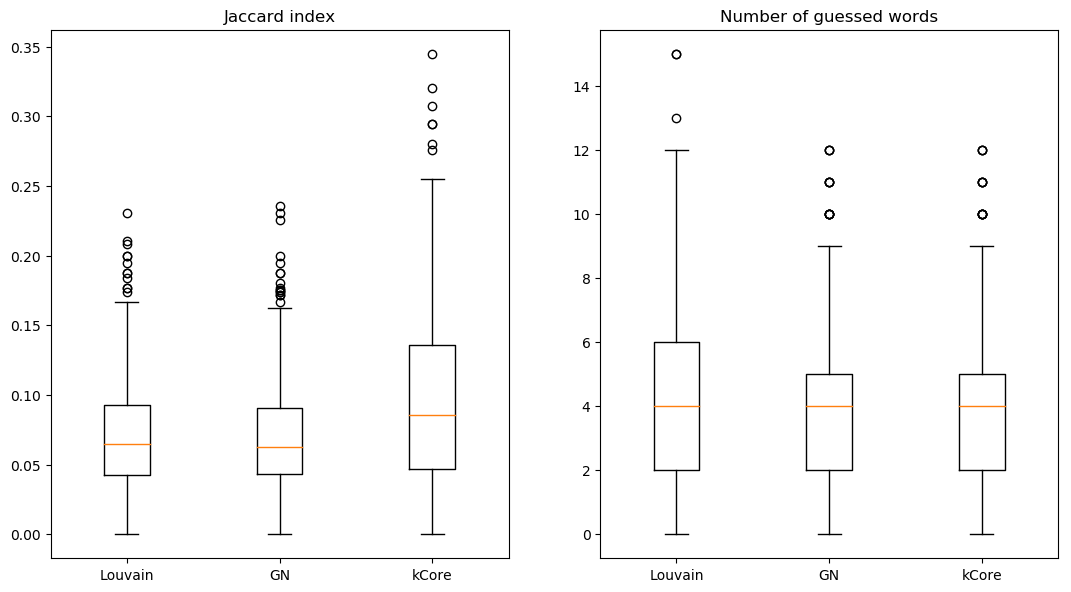

In [18]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(13,7))

ax1.boxplot(jacData,labels=labs)
ax1.set_title("Jaccard index")

ax2.boxplot(guessData,labels=labs)
ax2.set_title("Number of guessed words")